 # Visualizations
 
 ## 1. Importing Visualization Libraries and Data
 ## 2. Pick out variables from the data set suitable for exploratory visual analysis.
 ## 3. Create a correlation matrix heatmap (colored).
 ## 4. Create scatterplots for the variables with the strongest correlations and examine the nature of their relationships.
 ## 5. Create a pair plot of the entire data set.
 ## 6. Create a categorical plot and interpret the results.
 ## 7. Revisit the questions generated in the previous task and write answers to those I  can based on the exploration so far. 
## 8. Define any hypotheses that I can at this point.

## 1. Imporing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [ ]:
# To display charts in the notebook without calling them

%matplotlib inline

In [3]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 6\Data'

In [4]:
# Importing data set

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'billionaires_cleaned.csv'), index_col = False)

## 2. Pick out variables from the data set suitable for exploratory visual analysis.

In [5]:
# Removing the limit to columns displayed so I can see all the columns going forward

pd.options.display.max_columns = None

In [6]:
# Viewing column names

df.columns

Index(['Unnamed: 0', 'rank', 'final_worth', 'name', 'age', 'country', 'city',
       'industries', 'citizenship_country', 'self_made', 'gender', 'state',
       'state_region', 'cpi_country', 'cpi_change_country', 'gdp_country',
       'tertiary_ed_enroll', 'primary_ed_enroll', 'life_expectancy_country',
       'total_tax_rate_country', 'population_country', 'latitude_country',
       'longitude_country'],
      dtype='object')

In [7]:
# Create a subset excluding the string variables and 'cpi_change_country', 'total_tax_rate_country', 'latitude_country', and 'longitude_country'

sub = df[['final_worth', 'age', 'cpi_country', 'gdp_country', 'tertiary_ed_enroll', 'primary_ed_enroll', 'life_expectancy_country', 
         'population_country']]

In [8]:
sub

,final_worth,age,cpi_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,population_country
0,211000,74.0,110.05,2.715518e+12,65.6,102.5,82.5,6.705989e+07
1,180000,51.0,117.24,2.142770e+13,88.2,101.8,78.5,3.282395e+08
2,114000,59.0,117.24,2.142770e+13,88.2,101.8,78.5,3.282395e+08
3,107000,78.0,117.24,2.142770e+13,88.2,101.8,78.5,3.282395e+08
4,106000,92.0,117.24,2.142770e+13,88.2,101.8,78.5,3.282395e+08
...,...,...,...,...,...,...,...,...
2635,1000,51.0,125.08,1.991000e+13,50.6,100.2,77.0,1.397715e+09
2636,1000,80.0,117.24,2.142770e+13,88.2,101.8,78.5,3.282395e+08
2637,1000,60.0,125.08,1.991000e+13,50.6,100.2,77.0,1.397715e+09
2638,1000,71.0,125.08,1.991000e+13,50.6,100.2,77.0,1.397715e+09


## 3. Create a correlation matrix heatmap (colored).

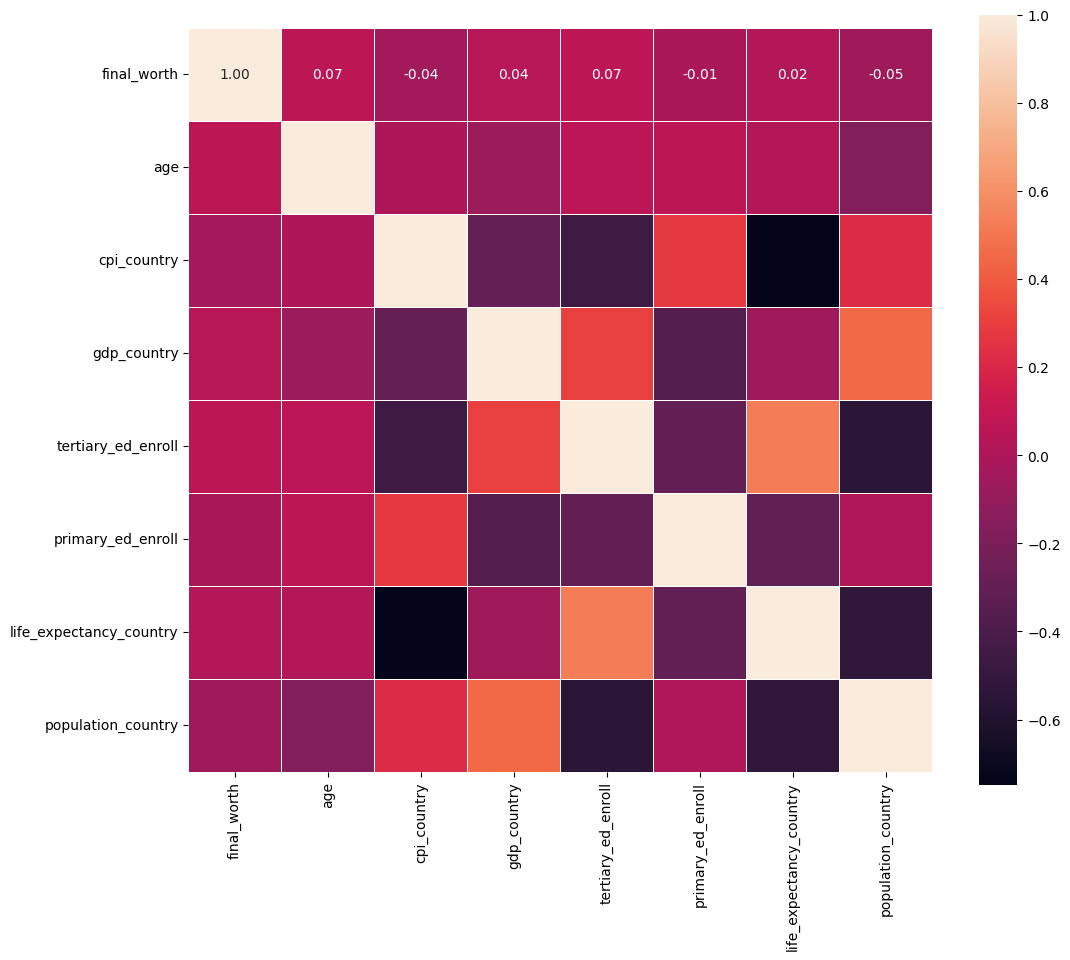

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto subplot defined above.
corr = sns.heatmap(sub.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)

# Adjust the aspect ratio of the heatmap
ax.set_aspect("equal")

### The highest, positive correlation is between tertiary_ed_enroll and life_expectancy_country.
### There were no relevant correlations between someones final worth and any of the other factors in the heatmap.

## 4. Create scatterplots for the variables with the strongest correlations and examine the nature of their relationships.

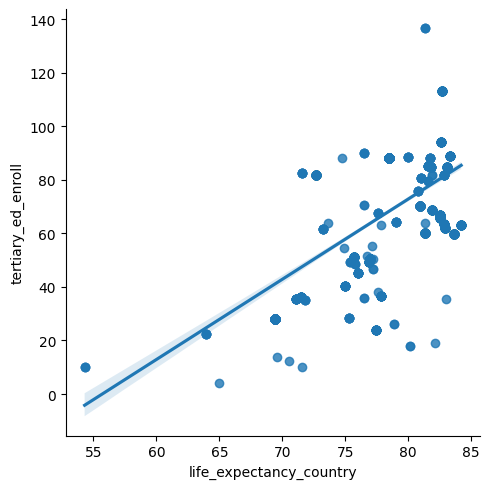

In [10]:
# Create a scatterplot for the "life_expectancy_country" and "tertiary_ed_enroll" columns in seaborn

sns.lmplot(x = 'life_expectancy_country', y = 'tertiary_ed_enroll', data = df)

### There is a strong correlation between the tertiary education enrollment in a country and that country's life expectancy. However, there are many points that are not near the regression line, showing a lot of variability. And, there is one distinct outlier near age 81 and tertiary education enrollment near 140%.

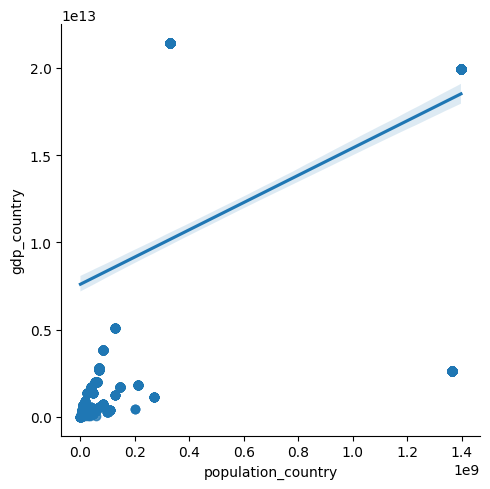

In [11]:
# Create a scatterplot for the "population_country" and "gdp_country" columns in seaborn

sns.lmplot(x = 'population_country', y = 'gdp_country', data = df)

### There is a strong correlation between a country's population size and its gross domestic product according to the according to its correlation coefficient. However, none of the points are actually near the line. There are 3 outliers that are probably affecting the regression line. The vast majority of the countries have both low population and low GDP. Without those three that are far from the rest of the data points, the correlation might be even stronger.

 ## 5. Create a pair plot of the entire data set.

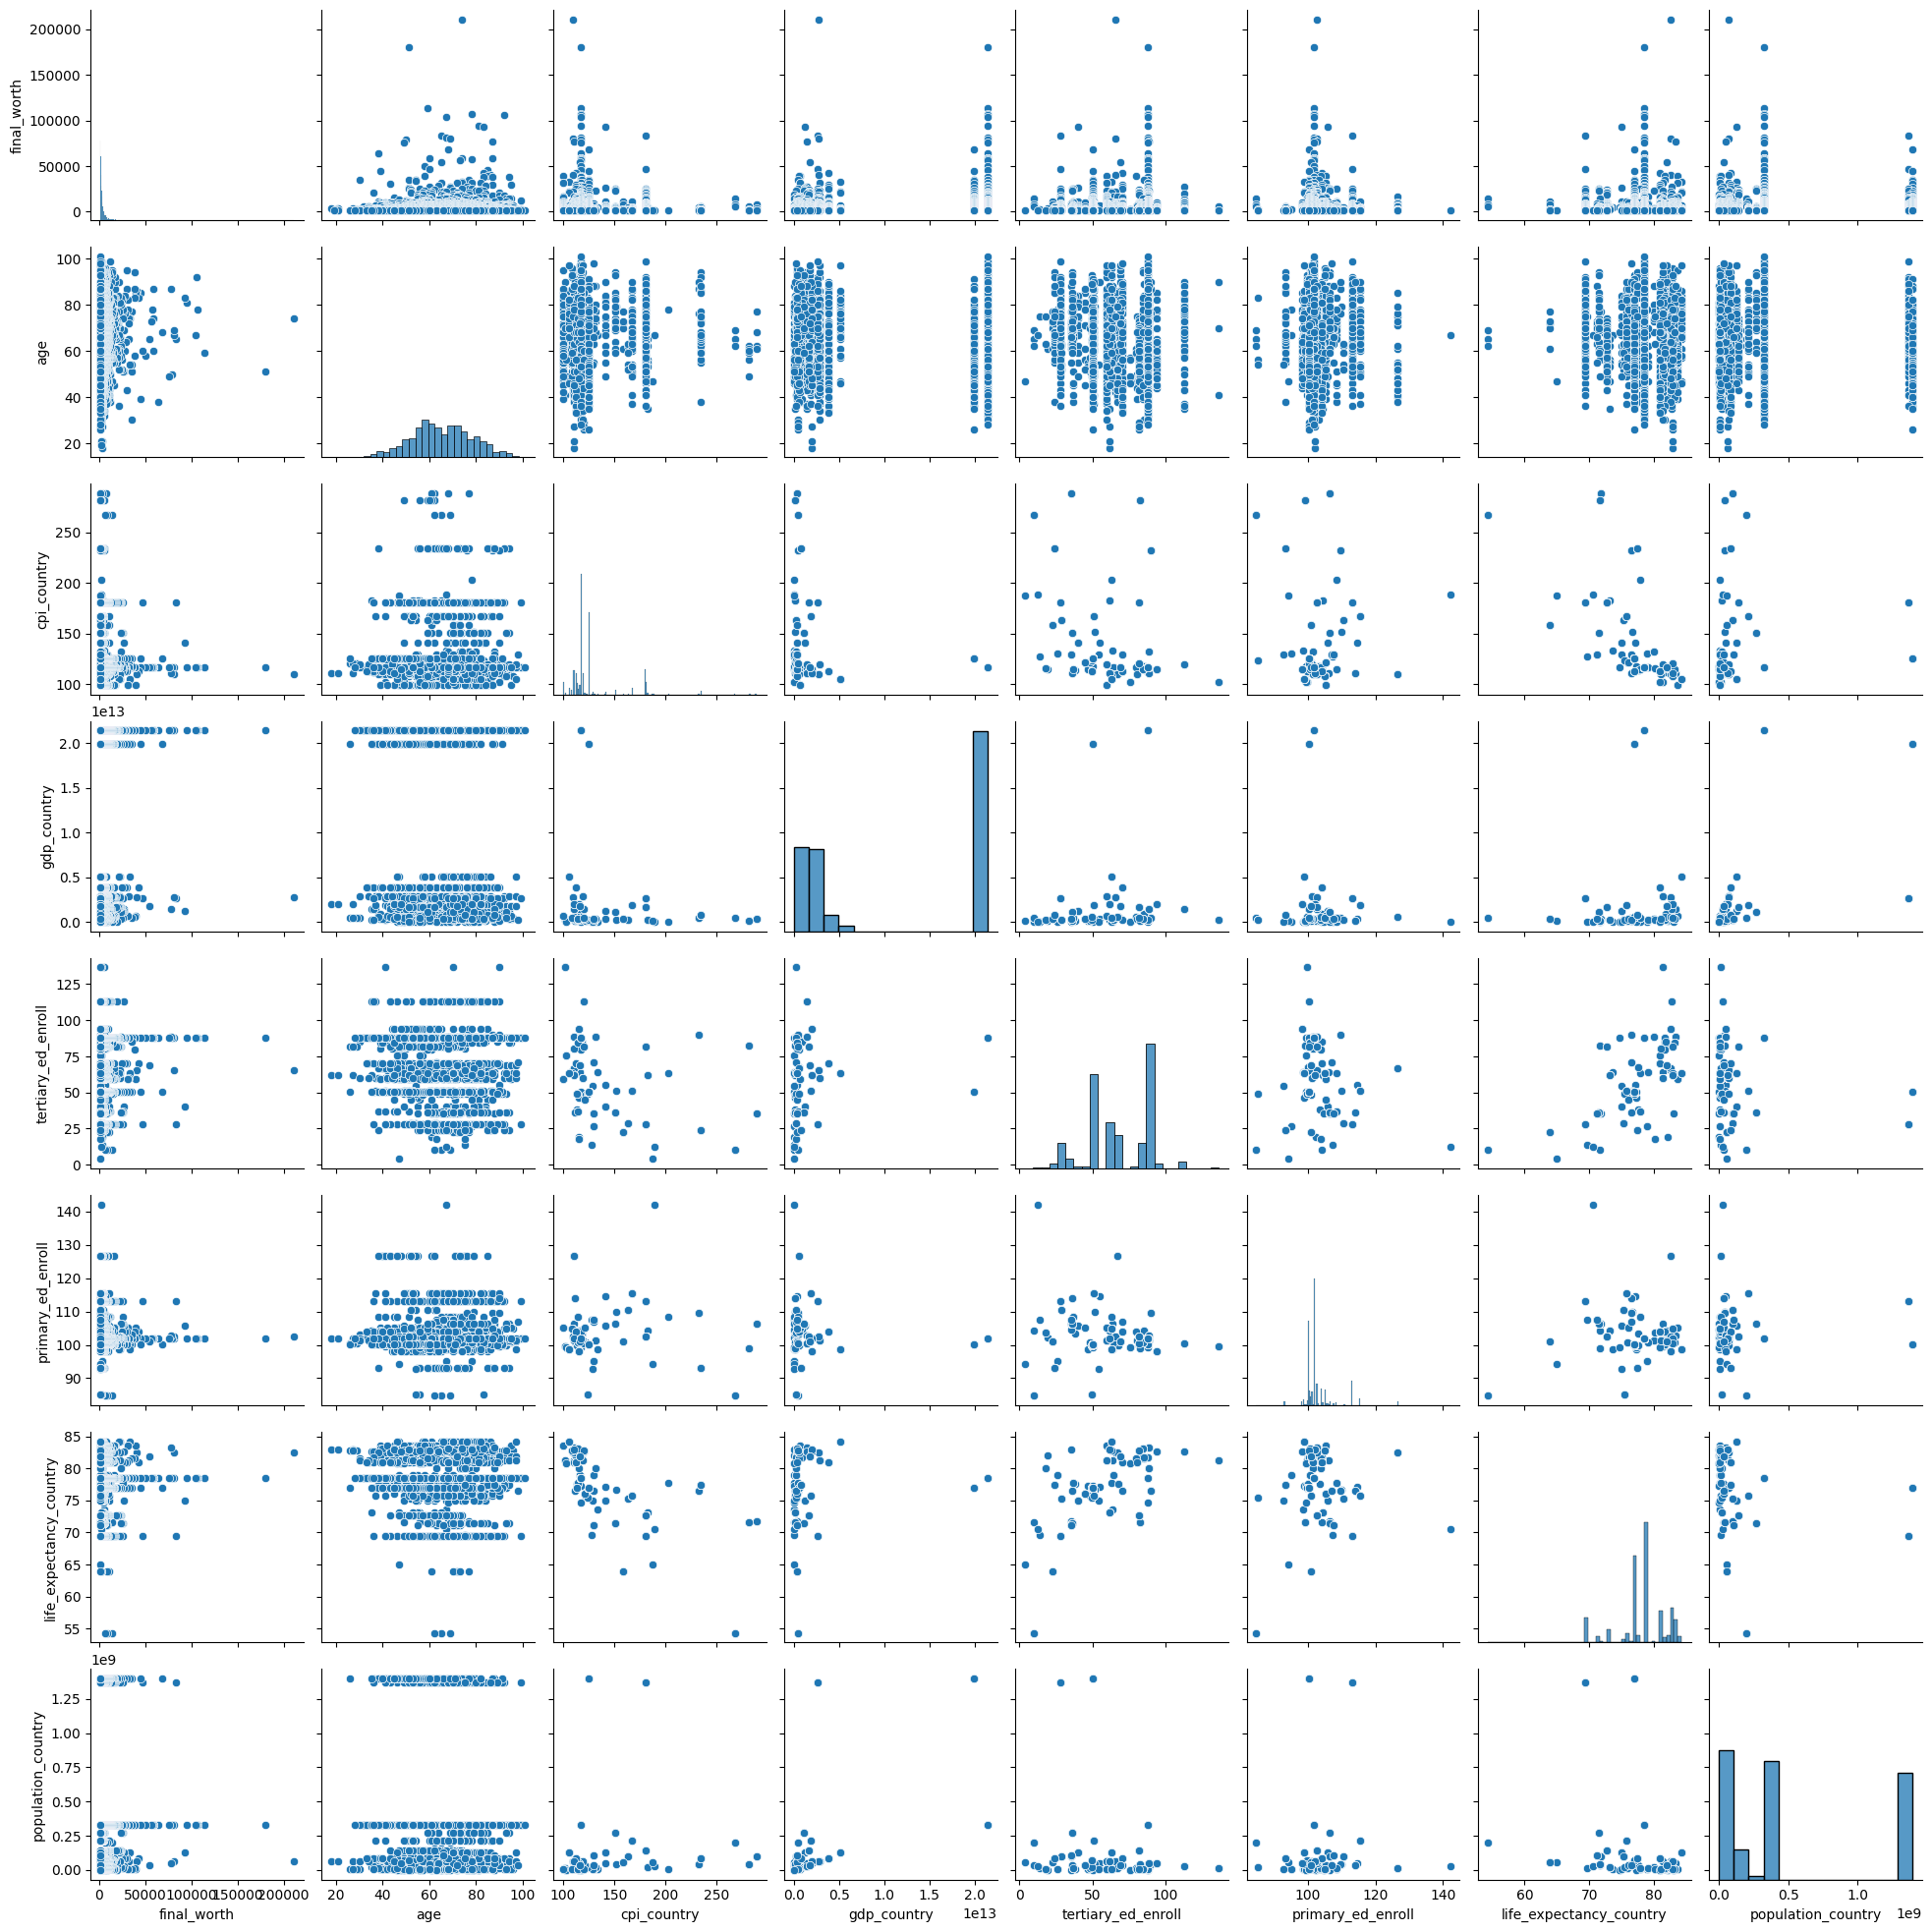

In [12]:
# Create a pair plot 

g = sns.pairplot(sub)

### Since my main interest in this data set has to do with the factors that correlate with wealth, I want to look at "final_worth" as it is compared with other fields. Most of these scatterplots look potentially interesting. For example, "final_worth" correlated with both "gdp_country" and "population_country" show similar patterns of data clumping at low and high points, with seemingly no data points in between. I'd also like to investigate further into the "final_worth" and "life_expectancy_country" correlation. The data points seem to congregate on the longer life expectancy end. And, lastly, I'd like to look further into any correlations that might exist between education statistics in their countries. The data points seem to trend towards the lower ends of education rates, which seems strange to me, and I'd look to look into that.

## 6. Create a categorical plot and interpret the results.

<Axes: xlabel='age', ylabel='Count'>

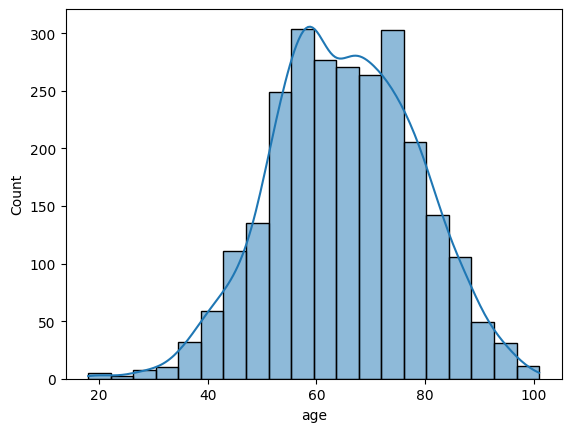

In [13]:
# Create a histogram to visualize the distribution of ages. 


sns.histplot(df['age'], bins = 20, kde = True)

In [14]:
# Create age categories

df.loc[df['age'] < 25, 'age_category'] = 'very young'

In [15]:
df.loc[(df['age'] >= 25) & (df['age'] < 40), 'age_category'] = 'young'

In [16]:
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age_category'] = 'middle-aged'

In [17]:
df.loc[(df['age'] >= 60) & (df['age'] < 80), 'age_category'] = 'old'

In [18]:
df.loc[df['age'] >= 80, 'age_category'] = 'very old'

In [19]:
df['age_category'].value_counts(dropna = False)

age_category
old            1278
middle-aged     848
very old        382
NaN              65
young            62
very young        5
Name: count, dtype: int64

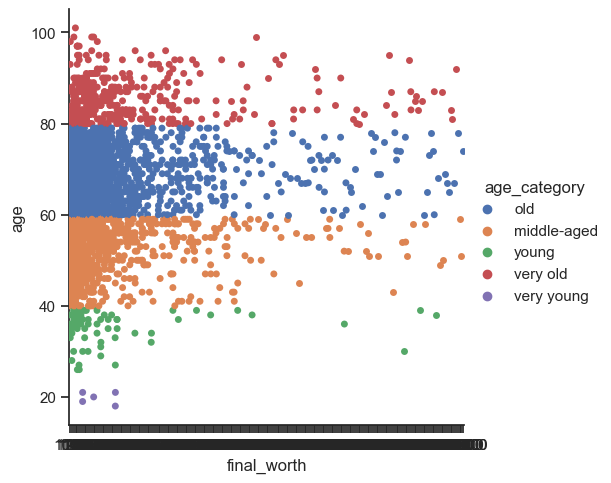

In [20]:
# Create a categorical plot in seaborn using the age categories created above

sns.set(style="ticks")
g = sns.catplot(x="final_worth", y="age", hue="age_category", data=df) 

### The final_woth on the x axis has too many values on it to be visible or useful. I wonder how this chart would look if I made categories for the final_worth also.

<Axes: xlabel='final_worth', ylabel='Count'>

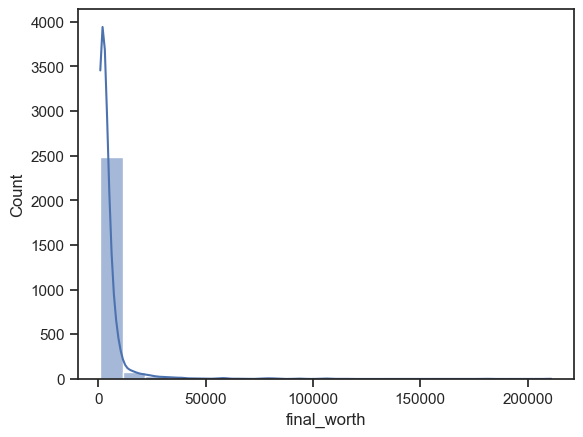

In [21]:
# Create a histogram to visualize the distribution of final_worth. 


sns.histplot(df['final_worth'], bins = 20, kde = True)

### This is not a very informative histogram because the count of billionaires whose final worth is over 10 billion is too small to show up visibly on the graph. However, it does show me that the vast majority of billionaires have 5 billion or less in final_worth. I'll devide up the 'final_worth' category into smaller increments for amounts less than 5 billion and then chunk the rest into larger groupings.

In [32]:
# Create final_worth categories

df.loc[df['final_worth'] < 2000, 'wealth_category'] = '<2B'

In [33]:
df.loc[(df['final_worth'] >= 2000) & (df['final_worth'] < 3000), 'wealth_category'] = '2-<3B' 

In [34]:
df.loc[(df['final_worth'] >=3000) & (df['final_worth'] <4000), 'wealth_category'] = '3-<4B'

In [35]:
df.loc[(df['final_worth'] >=4000) & (df['final_worth'] <5000), 'wealth_category'] = '4-<5B'

In [36]:
df.loc[(df['final_worth'] >=5000) & (df['final_worth'] <10000), 'wealth_category'] = '5-<10B'

In [37]:
df.loc[(df['final_worth'] >=10000) & (df['final_worth'] <50000), 'wealth_category'] = '10-<50B'

In [38]:
df.loc[df['final_worth'] >=50000, 'wealth_caeltegory'] = '>=50B'

In [39]:
df['wealth_category'].value_counts(dropna = False)

wealth_category
<2B        1066
2-<3B       548
5-<10B      369
3-<4B       306
4-<5B       169
10-<50B     159
>=50B        23
Name: count, dtype: int64

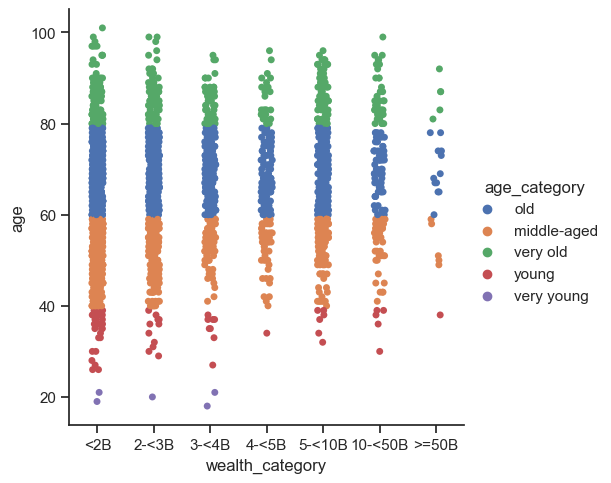

In [42]:
# Create a categorical plot in seaborn using the age and wealth categories created above
# I received help from chatGPT for ordering the x axis labels 

# Define the desired order for x-axis labels
x_order = ["<2B", "2-<3B", "3-<4B", "4-<5B", "5-<10B", "10-<50B", ">=50B"]

# Create a categorical plot in seaborn using the age and wealth categories created above
sns.set(style="ticks")
g = sns.catplot(x="wealth_category", y="age", hue="age_category", data=df, order=x_order)

### This has produced a much better categorical plot. Eventhough the wealth groupings are not even increments, this shows me a better visual of how the ages of billionaires are distributed by wealth. Those who are "very young" (under the age of 25), all have a final worth under 4 billion. For those who have the highest final worth (over 50 billion), there is only one person under 40, and most are "old" (between the ages of 60 and 79).

## 7. Revisit the questions generated in the previous task and write answers to those I  can based on the exploration so far. Add any new questions that may have arisen based on the early findings in the visual exploration.

### Unfortunately, this exploration did not answer any of the questions I had in the previous exercise. I believe that is because the original heatmap required me to compare only numerical data and then make scatterplots based on the numerical data with the highest correlations. Most of my questions involve categorical data, like numbers of males vs. females and self-made vs. inherited wealth. 

### However, with the final categorical plot, I was able to see some of the age distributions by wealth category. It does seem that age has an effect on wealth. One of the questions that arises from this is, of the young and very young people who are billionaires, what proportion of them are self-made and what proportion are inherited. I'd guess that more of them are inherited than self-made compared to other age categories. 

### In addition to the questions already posited in my previous assignment, I'd like to know why "final_worth", when correlated with both "gdp_country" and "population_country" shows similar patterns of data clumping at low and high points, with seemingly no data points in between. Also, according to the plot pairs above, it looks like there are more billionaires in countries where the consumer price index is lower. Is there a correlation there? If so, why?

## 8. Define any hypotheses that I can at this point.

### There are more billionaires in countries with lower consumer price index because it is easier to maintian wealth when inflation is lower. 

### The higher the rates of tertiary education in a country, the higher the proportion of billionaires there will be in that country.

### Countries with longer life expectancies will have a higher proportion of billionaires.